In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/predict-the-success-of-bank-telemarketing/sample_submission.csv
/kaggle/input/predict-the-success-of-bank-telemarketing/train.csv
/kaggle/input/predict-the-success-of-bank-telemarketing/test.csv


# ***Predict the Success of Bank telemarketing: 21f1003999***

## ***Part 1: Data Preprocessing and EDA***

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
train = pd.read_csv("/kaggle/input/predict-the-success-of-bank-telemarketing/train.csv")

In [4]:
test = pd.read_csv("/kaggle/input/predict-the-success-of-bank-telemarketing/test.csv")

In [5]:
print(train.shape)
print(test.shape)

(39211, 16)
(10000, 15)


***The data available, is already split up in training and testing data with the above dimensions***

In [6]:
#Renaming the columns for better readability
train = train.rename(columns={
    'last contact date':'Last_contact_date',
    'age':'Age',
    'job':'Job',
    'marital':'Marital',
    'education':'Education',
    'default':'Default',
    'balance':'Balance',
    'housing':'Housing',
    'loan':'Loan',
    'contact':'Contact',
    'duration':'Duration',
    'campaign':'Campaign',
    'pdays':'P_Days',
    'previous':'Previous',
    'poutcome':'P_Outcome',
    'target':'Target'
})
test = test.rename(columns={
    'last contact date':'Last_contact_date',
    'age':'Age',
    'job':'Job',
    'marital':'Marital',
    'education':'Education',
    'default':'Default',
    'balance':'Balance',
    'housing':'Housing',
    'loan':'Loan',
    'contact':'Contact',
    'duration':'Duration',
    'campaign':'Campaign',
    'pdays':'P_Days',
    'previous':'Previous',
    'poutcome':'P_Outcome'
})

In [7]:
train.head()

,Last_contact_date,Age,Job,Marital,Education,Default,Balance,Housing,Loan,Contact,Duration,Campaign,P_Days,Previous,P_Outcome,Target
0,2009-04-17,26,blue-collar,married,secondary,no,647,yes,no,cellular,357,2,331,1,other,no
1,2009-10-11,52,technician,married,secondary,no,553,yes,no,telephone,160,1,-1,0,NaN,no
2,2010-11-20,44,blue-collar,married,secondary,no,1397,no,no,cellular,326,1,-1,0,NaN,no
3,2009-09-01,33,admin.,married,secondary,no,394,yes,no,telephone,104,3,-1,0,NaN,no
4,2008-01-29,31,entrepreneur,single,tertiary,no,137,no,no,cellular,445,2,-1,0,NaN,no


In [8]:
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39211 entries, 0 to 39210
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Last_contact_date  39211 non-null  object
 1   Age                39211 non-null  int64 
 2   Job                38982 non-null  object
 3   Marital            39211 non-null  object
 4   Education          37744 non-null  object
 5   Default            39211 non-null  object
 6   Balance            39211 non-null  int64 
 7   Housing            39211 non-null  object
 8   Loan               39211 non-null  object
 9   Contact            28875 non-null  object
 10  Duration           39211 non-null  int64 
 11  Campaign           39211 non-null  int64 
 12  P_Days             39211 non-null  int64 
 13  Previous           39211 non-null  int64 
 14  P_Outcome          9760 non-null   object
 15  Target             39211 non-null  object
dtypes: int64(6), object(10)
memory usage: 4.

***The basic structure of the data, the datatypes of the features is visible above.***

In [9]:
feature_list = train.columns[:-1].values
label = [train.columns[-1]]
print("Feature Names",feature_list)
print("Target Variable",label)

Feature Names ['Last_contact_date' 'Age' 'Job' 'Marital' 'Education' 'Default' 'Balance'
 'Housing' 'Loan' 'Contact' 'Duration' 'Campaign' 'P_Days' 'Previous'
 'P_Outcome']
Target Variable ['Target']


In [10]:
#Checking for unwanted characters in the columns
values_to_remove = ['?',' ?','? ',' ',',','  ']
print(train.isin(values_to_remove).sum())
print(test.isin(values_to_remove).sum())

Last_contact_date    0
Age                  0
Job                  0
Marital              0
Education            0
Default              0
Balance              0
Housing              0
Loan                 0
Contact              0
Duration             0
Campaign             0
P_Days               0
Previous             0
P_Outcome            0
Target               0
dtype: int64
Last_contact_date    0
Age                  0
Job                  0
Marital              0
Education            0
Default              0
Balance              0
Housing              0
Loan                 0
Contact              0
Duration             0
Campaign             0
P_Days               0
Previous             0
P_Outcome            0
dtype: int64


***Unique values in each column(to a certain extent)***

In [11]:
columns = ['Last_contact_date','Age','Job','Marital','Education','Default','Balance',
'Housing','Loan','Contact','Duration','Campaign','P_Days','Previous','P_Outcome','Target']
for column in columns:
    print(f"Unique values in {column}:")
    print(train[column].unique())
    print()

Unique values in Last_contact_date:
['2009-04-17' '2009-10-11' '2010-11-20' ... '2009-07-05' '2008-02-25'
 '2010-04-12']

Unique values in Age:
[26 52 44 33 31 25 46 37 38 32 28 34 86 42 58 39 35 47 45 48 30 50 56 54
 40 53 41 51 27 29 57 63 36 43 19 55 49 23 83 60 22 80 76 59 24 93 71 89
 64 68 85 79 62 69 20 90 66 87 72 88 67 70 77 91 78 61 65 73 74 84 82 92
 81 18 21 75 94 95]

Unique values in Job:
['blue-collar' 'technician' 'admin.' 'entrepreneur' 'unemployed'
 'management' 'services' 'student' 'self-employed' 'retired' 'housemaid'
 nan]

Unique values in Marital:
['married' 'single' 'divorced']

Unique values in Education:
['secondary' 'tertiary' 'primary' nan]

Unique values in Default:
['no' 'yes']

Unique values in Balance:
[  647   553  1397 ...  4307  6187 38594]

Unique values in Housing:
['yes' 'no']

Unique values in Loan:
['no' 'yes']

Unique values in Contact:
['cellular' 'telephone' nan]

Unique values in Duration:
[ 357  160  326 ... 3506 4144 1631]

Unique values in

In [12]:
#Checking the missing values in the train and test data
print(train.isnull().sum())
print(test.isnull().sum())

Last_contact_date        0
Age                      0
Job                    229
Marital                  0
Education             1467
Default                  0
Balance                  0
Housing                  0
Loan                     0
Contact              10336
Duration                 0
Campaign                 0
P_Days                   0
Previous                 0
P_Outcome            29451
Target                   0
dtype: int64
Last_contact_date       0
Age                     0
Job                    59
Marital                 0
Education             390
Default                 0
Balance                 0
Housing                 0
Loan                    0
Contact              2684
Duration                0
Campaign                0
P_Days                  0
Previous                0
P_Outcome            7508
dtype: int64


***The Descriptive Statistics of train and test data:-***

In [13]:
train.describe()

,Age,Balance,Duration,Campaign,P_Days,Previous
count,39211.000000,39211.000000,39211.000000,39211.000000,39211.000000,39211.000000
mean,42.120247,5441.781719,439.062789,5.108770,72.256051,11.826171
std,12.709352,16365.292065,769.096291,9.890153,160.942593,44.140259
min,18.000000,-8019.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,98.000000,109.000000,1.000000,-1.000000,0.000000
50%,40.000000,549.000000,197.000000,2.000000,-1.000000,0.000000
75%,50.000000,2030.000000,380.000000,4.000000,-1.000000,0.000000
max,95.000000,102127.000000,4918.000000,63.000000,871.000000,275.000000


In [14]:
test.describe()

,Age,Balance,Duration,Campaign,P_Days,Previous
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,42.261200,5328.789200,437.117700,5.159700,71.705700,12.028100
std,12.650137,15944.545194,761.232963,9.975928,160.374253,44.467155
min,18.000000,-3372.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,92.000000,108.000000,1.000000,-1.000000,0.000000
50%,40.000000,541.000000,196.000000,2.000000,-1.000000,0.000000
75%,50.000000,2051.000000,380.000000,4.000000,-1.000000,0.000000
max,94.000000,101418.000000,4909.000000,63.000000,871.000000,275.000000


***Box-Plot for each numerical feature:***

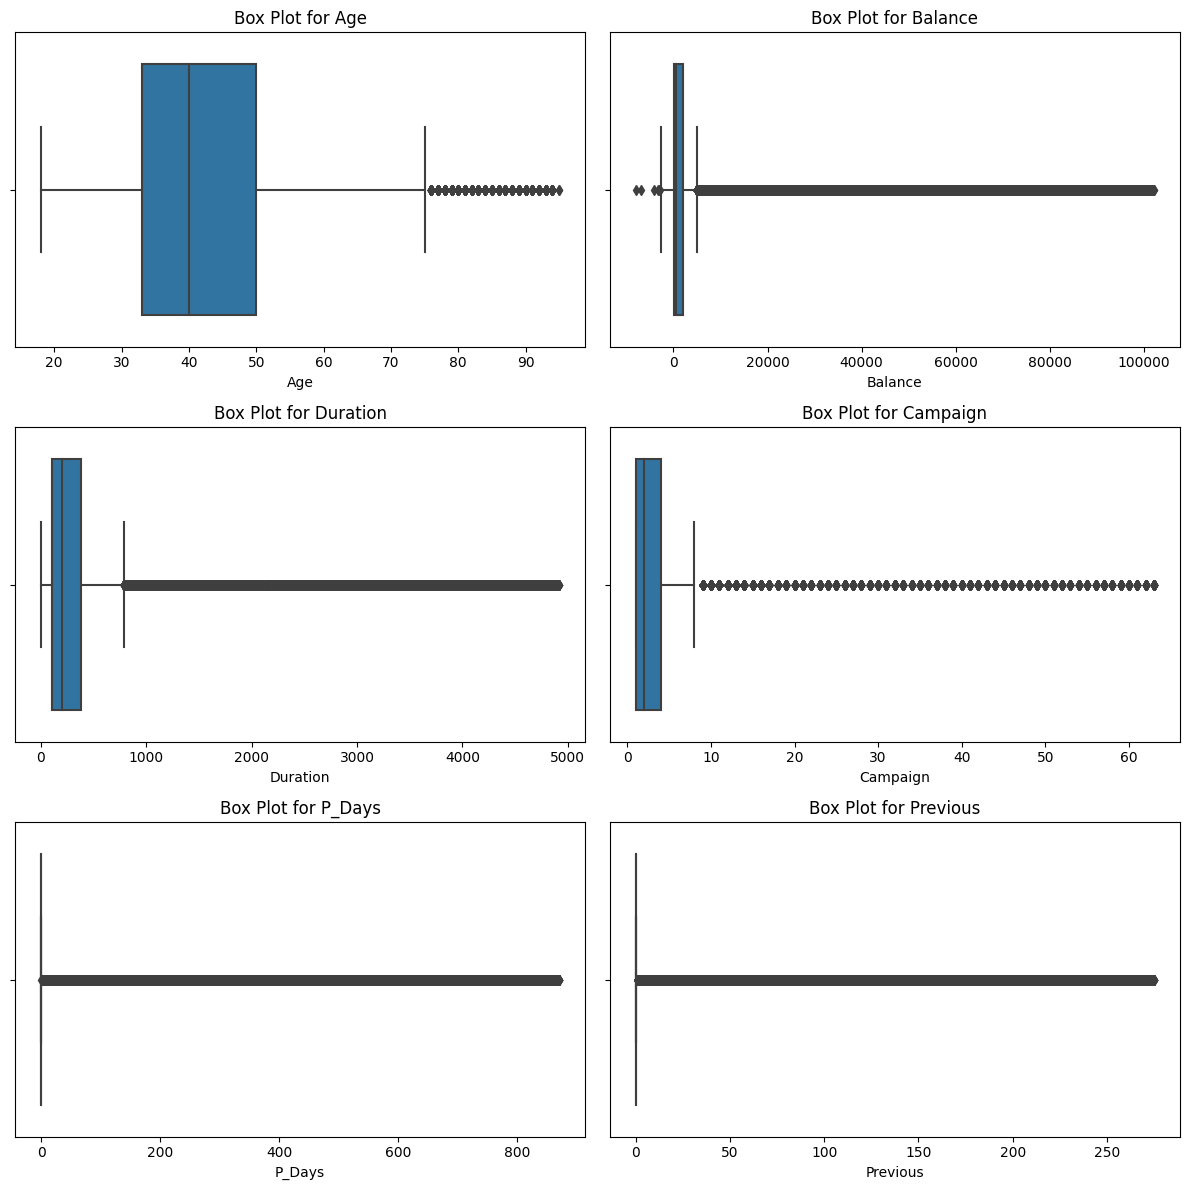

In [15]:
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
sns.boxplot(data=train, x='Age', ax=axes[0, 0])
axes[0, 0].set_title('Box Plot for Age')

sns.boxplot(data=train, x='Balance', ax=axes[0, 1])
axes[0, 1].set_title('Box Plot for Balance')

sns.boxplot(data=train, x='Duration', ax=axes[1, 0])
axes[1, 0].set_title('Box Plot for Duration')

sns.boxplot(data=train, x='Campaign', ax=axes[1, 1])
axes[1, 1].set_title('Box Plot for Campaign')

sns.boxplot(data=train, x='P_Days', ax=axes[2, 0])
axes[2, 0].set_title('Box Plot for P_Days')

sns.boxplot(data=train, x='Previous', ax=axes[2, 1])
axes[2, 1].set_title('Box Plot for Previous')

plt.tight_layout()
plt.show()

In [16]:
train['P_Outcome'].fillna('Missing',inplace = True)
train['Contact'].fillna('Missing',inplace = True)
mode_edu = train['Education'].mode()[0]
train['Education'].fillna(mode_edu,inplace = True)
mode_job = train['Job'].mode()[0]
train['Job'].fillna(mode_job,inplace = True)

In [17]:
test['P_Outcome'].fillna('Missing',inplace = True)
test['Contact'].fillna('Missing',inplace = True)
mode_edu_02 = test['Education'].mode()[0]
test['Education'].fillna(mode_edu_02,inplace = True)
mode_job_02 = test['Job'].mode()[0]
test['Job'].fillna(mode_job_02,inplace = True)

In [18]:
print(train.isnull().sum())
print(test.isnull().sum())

Last_contact_date    0
Age                  0
Job                  0
Marital              0
Education            0
Default              0
Balance              0
Housing              0
Loan                 0
Contact              0
Duration             0
Campaign             0
P_Days               0
Previous             0
P_Outcome            0
Target               0
dtype: int64
Last_contact_date    0
Age                  0
Job                  0
Marital              0
Education            0
Default              0
Balance              0
Housing              0
Loan                 0
Contact              0
Duration             0
Campaign             0
P_Days               0
Previous             0
P_Outcome            0
dtype: int64


In [19]:
train['Last_contact_date'] = pd.to_datetime(train['Last_contact_date'], format='%Y-%m-%d', errors='coerce')
test['Last_contact_date'] = pd.to_datetime(test['Last_contact_date'], format='%Y-%m-%d', errors='coerce')

In [20]:
train['Last_contact_day'] = train['Last_contact_date'].dt.day
train['Last_contact_month'] = train['Last_contact_date'].dt.month
train['Last_contact_year'] = train['Last_contact_date'].dt.year

test['Last_contact_day'] = test['Last_contact_date'].dt.day
test['Last_contact_month'] = test['Last_contact_date'].dt.month
test['Last_contact_year'] = test['Last_contact_date'].dt.year

In [21]:
train['Age_Duration'] = train['Age'] * train['Duration']
train['Balance_Previous'] = train['Balance'] * train['Previous']
train['Duration_Campaign'] = train['Duration'] * train['Campaign']

test['Age_Duration'] = test['Age'] * test['Duration']
test['Balance_Previous'] = test['Balance'] * test['Previous']
test['Duration_Campaign'] = test['Duration'] * test['Campaign']

In [22]:
def convert_01(pdays):
    if pdays == -1:
        return 'Never Contacted'
    elif pdays <= 10:
        return 'Recently Contacted'
    elif pdays <= 30:
        return 'Contacted This Month'
    elif pdays <= 90:
        return 'Contacted This Quarter'
    elif pdays <= 180:
        return 'Contacted This Semester'
    elif pdays <= 365:
        return 'Contacted This Year'
    elif pdays <= 730:
        return 'Contacted Last Year'
    else:
      return 'Contact Two Years Ago'

train['P_Days_Cat'] = train['P_Days'].apply(convert_01)
test['P_Days_Cat'] = test['P_Days'].apply(convert_01)

In [23]:
def convert_02(balance):
    if balance < 0:
        return 'In Debt'
    elif balance == 0:
        return 'No Balance'
    elif balance <= 1000:
        return 'Low Balance'
    elif balance <= 5000:
        return 'Medium Balance'
    elif balance <= 20000:
        return 'High Balance'
    else:
        return 'Very High Balance'

train['Balance_Cat'] = train['Balance'].apply(convert_02)
test['Balance_Cat'] = test['Balance'].apply(convert_02)

In [24]:
print(f"Unique Values and Value Count for the P_Days Column :\n{train['P_Days_Cat'].value_counts()}")

Unique Values and Value Count for the P_Days Column :
P_Days_Cat
Never Contacted            29446
Contacted This Year         4161
Contacted This Semester     2344
Contacted Last Year         1836
Contacted This Quarter       633
Contact Two Years Ago        539
Recently Contacted           134
Contacted This Month         118
Name: count, dtype: int64


In [25]:
print(f"Unique Values and Value Count for the Balance Column :\n{train['Balance_Cat'].value_counts()}")

Unique Values and Value Count for the Balance Column :
Balance_Cat
Low Balance          18617
Medium Balance        9511
In Debt               2971
No Balance            2799
Very High Balance     2715
High Balance          2598
Name: count, dtype: int64


array([[<Axes: title={'center': 'Last_contact_date'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Balance'}>,
        <Axes: title={'center': 'Duration'}>],
       [<Axes: title={'center': 'Campaign'}>,
        <Axes: title={'center': 'P_Days'}>,
        <Axes: title={'center': 'Previous'}>,
        <Axes: title={'center': 'Last_contact_day'}>],
       [<Axes: title={'center': 'Last_contact_month'}>,
        <Axes: title={'center': 'Last_contact_year'}>,
        <Axes: title={'center': 'Age_Duration'}>,
        <Axes: title={'center': 'Balance_Previous'}>],
       [<Axes: title={'center': 'Duration_Campaign'}>, <Axes: >,
        <Axes: >, <Axes: >]], dtype=object)

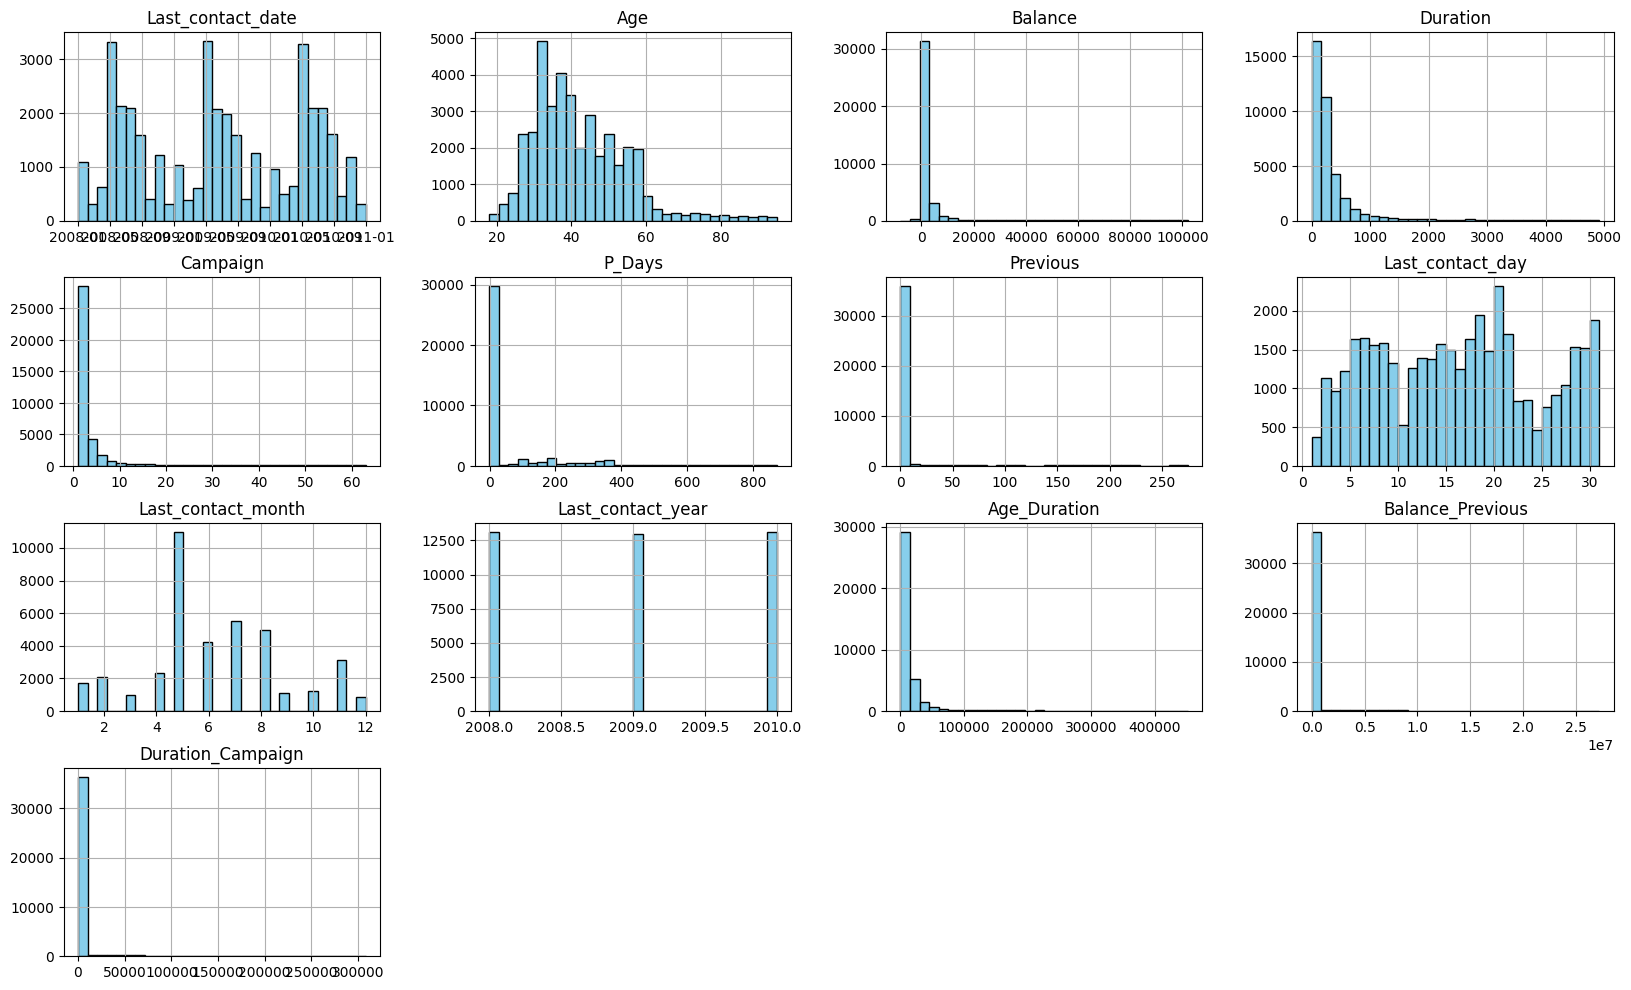

In [26]:
train.hist(bins = 30,color = 'skyblue',edgecolor = 'black',figsize = (20,12))

In [27]:
from scipy.stats import skew
skewness = train.select_dtypes(include=['float64', 'int64']).apply(lambda x: skew(x, nan_policy='omit'))
print(skewness)

Age                  1.124235
Balance              4.063432
Duration             3.700443
Campaign             3.839446
P_Days               2.611674
Previous             4.206412
Age_Duration         4.861776
Balance_Previous     5.572778
Duration_Campaign    5.643844
dtype: float64


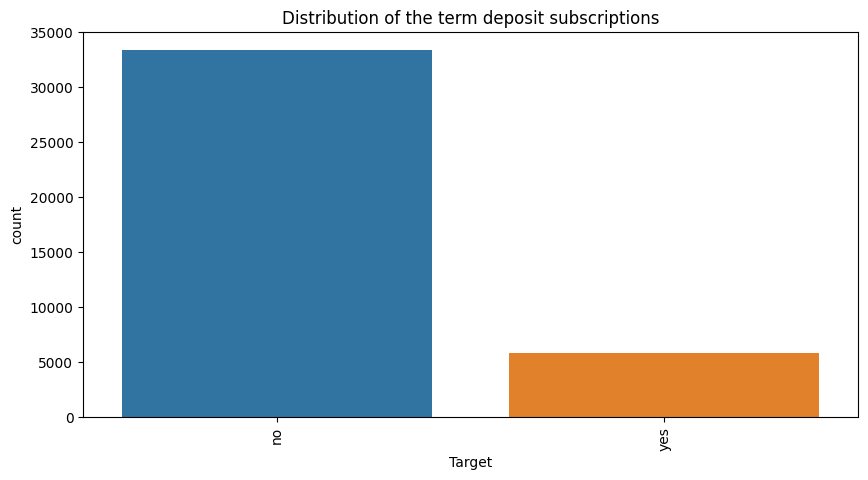

In [28]:
plt.figure(figsize = (10,5))
sns.countplot(data = train,x = 'Target',order = train['Target'].value_counts().index)
plt.title("Distribution of the term deposit subscriptions")
plt.xticks(rotation=90)
plt.show()

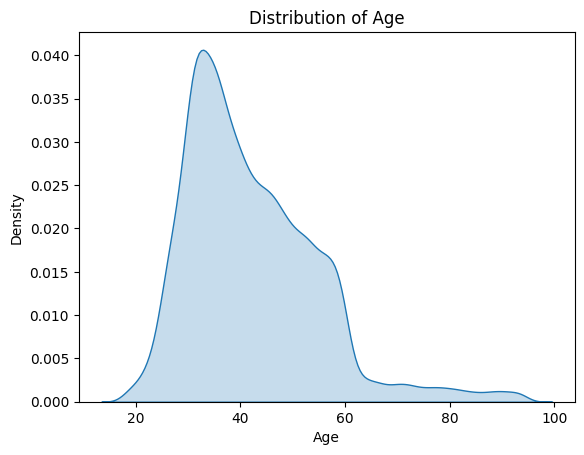

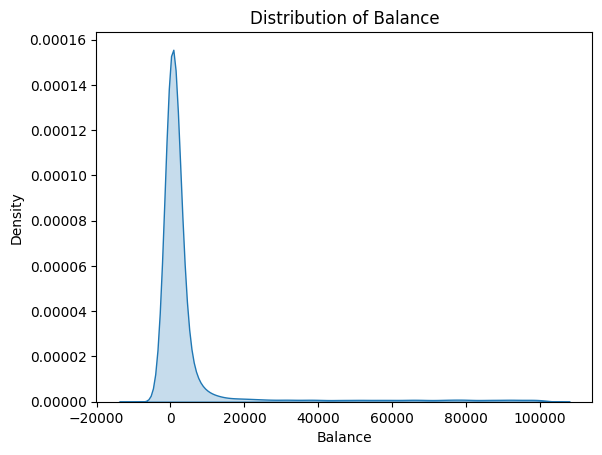

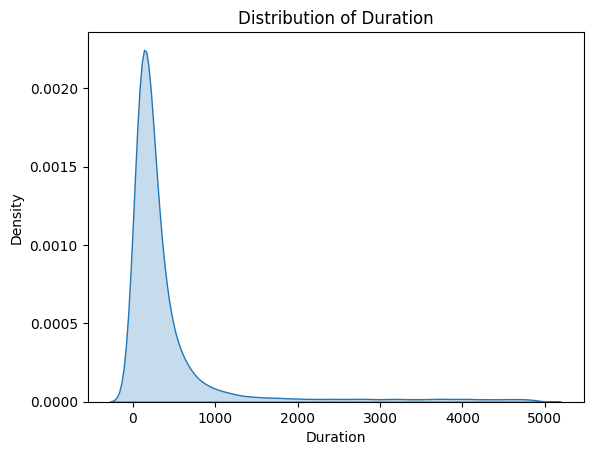

In [29]:
for col in ['Age', 'Balance', 'Duration']:
    sns.kdeplot(train[col], shade=True)
    plt.title(f'Distribution of {col}')
    plt.show()

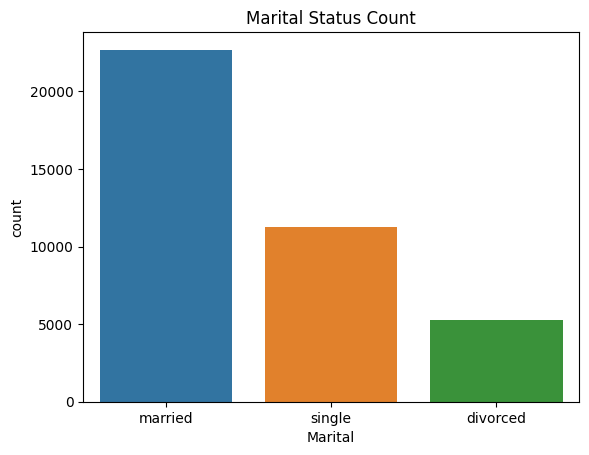

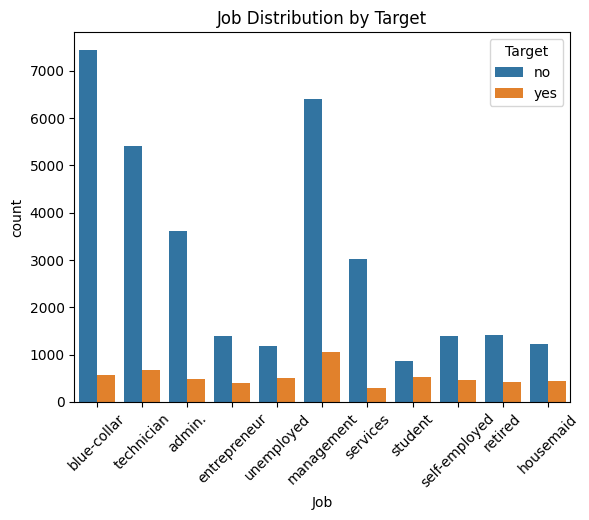

In [30]:
sns.countplot(x='Marital', data=train)
plt.title('Marital Status Count')
plt.show()

sns.countplot(x='Job', hue='Target', data=train)
plt.title('Job Distribution by Target')
plt.xticks(rotation=45)
plt.show()


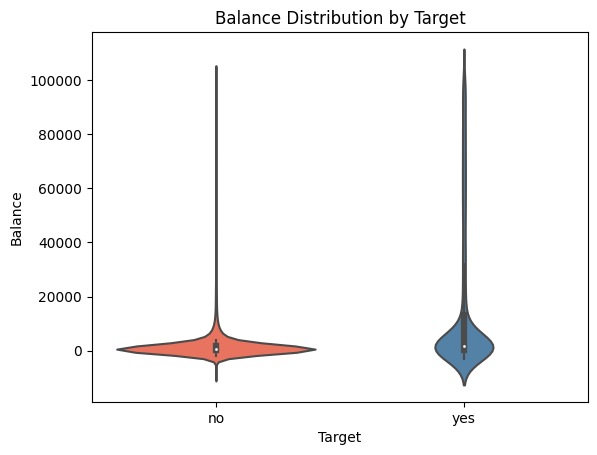

In [31]:
sns.violinplot(
    data=train,
    x='Target', y='Balance',
    palette=['#FF6347', '#4682B4']
)
plt.title('Balance Distribution by Target')
plt.show()


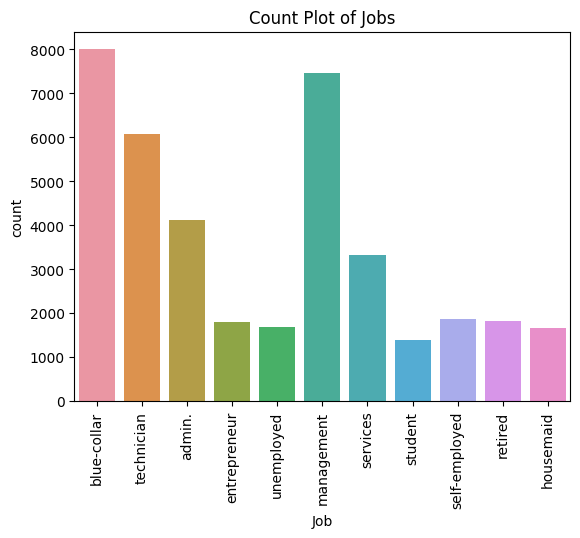

In [32]:
sns.countplot(x='Job', data=train)
plt.title('Count Plot of Jobs')
plt.xticks(rotation=90)
plt.show()

In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39211 entries, 0 to 39210
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Last_contact_date   39211 non-null  datetime64[ns]
 1   Age                 39211 non-null  int64         
 2   Job                 39211 non-null  object        
 3   Marital             39211 non-null  object        
 4   Education           39211 non-null  object        
 5   Default             39211 non-null  object        
 6   Balance             39211 non-null  int64         
 7   Housing             39211 non-null  object        
 8   Loan                39211 non-null  object        
 9   Contact             39211 non-null  object        
 10  Duration            39211 non-null  int64         
 11  Campaign            39211 non-null  int64         
 12  P_Days              39211 non-null  int64         
 13  Previous            39211 non-null  int64     

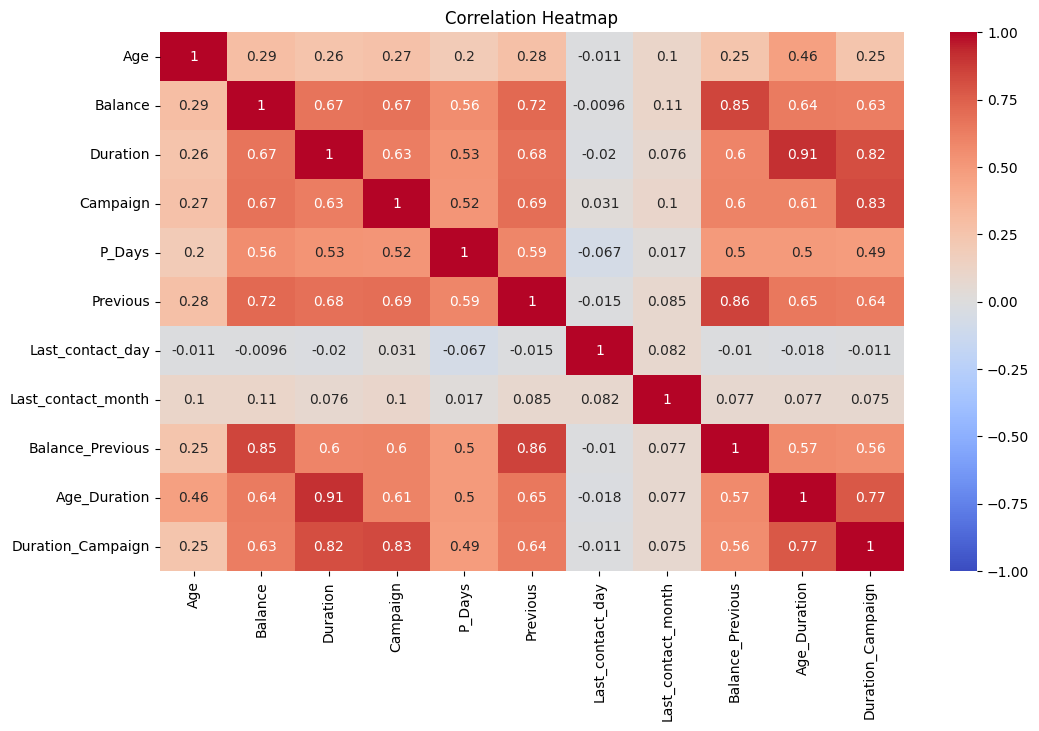

In [34]:
num_cols= [
    'Age',
    'Balance',
    'Duration',
    'Campaign',
    'P_Days',
    'Previous',
    'Last_contact_day',
    'Last_contact_month',
    'Balance_Previous',
    'Age_Duration',
    'Duration_Campaign'
]

plt.figure(figsize = (12,7))
corr_map = train[num_cols].corr()
sns.heatmap(corr_map, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

In [35]:
columns_to_drop = ['Last_contact_date']

train = train.drop(columns=columns_to_drop, axis=1)
test = test.drop(columns=columns_to_drop, axis = 1)

***Using Winsorization to cap the outliers***

In [36]:
from scipy.stats.mstats import winsorize
def winsorization(df, cols, limits=(0.05, 0.1)):
    for col in cols:
        df[col] = winsorize(df[col], limits=limits)
    return df
outlier_cols = ['Balance', 'Duration','Campaign','Age_Duration','Balance_Previous','Duration_Campaign']
train = winsorization(train, outlier_cols)
test = winsorization(test, outlier_cols)

In [37]:
col_cbrt = [
    'Age', 'Balance', 'Duration', 'Campaign', 'P_Days', 
    'Previous', 'Age_Duration', 'Balance_Previous', 'Duration_Campaign'
]
for col in col_cbrt:
    train[col] = np.cbrt(train[col])

for col in col_cbrt:
    test[col] = np.cbrt(test[col])

In [38]:
from scipy.stats import skew
skewness = train.select_dtypes(include=['float64', 'int64']).apply(lambda x: skew(x, nan_policy='omit'))
print(skewness)

Age                  0.539637
Balance             -0.037538
Duration             0.479551
Campaign             0.808423
P_Days               1.344457
Previous             2.713905
Age_Duration         0.521526
Balance_Previous     1.743683
Duration_Campaign    0.884658
dtype: float64


In [39]:
X = train.drop('Target',axis = 1)
y = train['Target']

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size = 0.3,random_state = 42)
print(X_train.shape,X_val.shape,y_train.shape,y_val.shape)

(27447, 22) (11764, 22) (27447,) (11764,)


In [41]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27447 entries, 8197 to 15795
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 27447 non-null  float64
 1   Job                 27447 non-null  object 
 2   Marital             27447 non-null  object 
 3   Education           27447 non-null  object 
 4   Default             27447 non-null  object 
 5   Balance             27447 non-null  float64
 6   Housing             27447 non-null  object 
 7   Loan                27447 non-null  object 
 8   Contact             27447 non-null  object 
 9   Duration            27447 non-null  float64
 10  Campaign            27447 non-null  float64
 11  P_Days              27447 non-null  float64
 12  Previous            27447 non-null  float64
 13  P_Outcome           27447 non-null  object 
 14  Last_contact_day    27447 non-null  int32  
 15  Last_contact_month  27447 non-null  int32  
 16  Last_c

In [42]:
numeric_features = [
    'Age', 'Balance', 'Duration', 'Campaign', 'P_Days', 'Previous','Age_Duration',
    'Balance_Previous','Duration_Campaign']
categorical_features = ['Job','Marital', 'Education', 'Default', 'Housing', 'Loan', 'Contact', 'P_Outcome','Balance_Cat','P_Days_Cat']


In [43]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectPercentile, f_classif

In [44]:
numeric_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler()),
    ('features',PolynomialFeatures(degree=2))
])

categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
])


Optimus = ColumnTransformer(
    transformers=[
        ('num', numeric_pipeline, numeric_features),
        ('cat', categorical_pipeline, categorical_features),
    ])

In [45]:
feature_selection_pipeline = Pipeline(steps=[
    ('preprocessor', Optimus),
    #('select_best', SelectPercentile(score_func=f_classif, percentile=75))
])
X_train_preprocessed = feature_selection_pipeline.fit_transform(X_train, y_train)
X_val_preprocessed = feature_selection_pipeline.transform(X_val)

In [46]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

## ***Part 2: Model Building***

In [47]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_preprocessed, y_train_encoded)

In [48]:
X_train_resampled.shape

(46782, 99)

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import GradientBoostingClassifier

In [50]:
import lightgbm as lgb
light = lgb.LGBMClassifier(random_state = 42,force_row_wise = True)
model_lgb = light.fit(X_train_resampled,y_train_resampled)
y_pred_lgb = model_lgb.predict(X_val_preprocessed)
print(f"Validation Accuracy:{accuracy_score(y_val_encoded,y_pred_lgb)}")
print(classification_report(y_val_encoded, y_pred_lgb))

[LightGBM] [Info] Number of positive: 23391, number of negative: 23391
[LightGBM] [Info] Total Bins 23915
[LightGBM] [Info] Number of data points in the train set: 46782, number of used features: 98
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Validation Accuracy:0.8536212172730364
              precision    recall  f1-score   support

           0       0.93      0.89      0.91      9993
           1       0.51      0.65      0.57      1771

    accuracy                           0.85     11764
   macro avg       0.72      0.77      0.74     11764
weighted avg       0.87      0.85      0.86     11764



In [51]:
from sklearn.model_selection import RandomizedSearchCV

In [52]:
param_dist_lgb= {
    'n_estimators': [50, 100, 200],
    'max_depth': [-1, 10, 20],
    'learning_rate': [0.01, 0.1, 0.2],
    'num_leaves': [31, 63, 127],
    'subsample': [0.8, 1.0],  
    'colsample_bytree': [0.8, 1.0]  
}

random_search_lgb = RandomizedSearchCV(
    estimator=light,
    param_distributions=param_dist_lgb,
    n_iter=30,
    scoring='f1_macro',
    cv=5,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

random_search_lgb.fit(X_train_resampled, y_train_resampled)
print("Best parameters for LightGBM: ", random_search_lgb.best_params_)


Fitting 5 folds for each of 30 candidates, totalling 150 fits
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 18713, number of negative: 18712
[LightGBM] [Info] Total Bins 23908
[LightGBM] [Info] Number of data points in the train set: 37425, number of used features: 98
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500013 -> initscore=0.000053
[LightGBM] [Info] Start training from score 0.000053
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=10, n_estimators=100, num_leaves=31, subsample=0.8; total time=   2.1s
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR

Best parameters for LightGBM:  {'subsample': 0.8, 'num_leaves': 127, 'n_estimators': 100, 'max_depth': 10, 'learning_rate': 0.1, 'colsample_bytree': 0.8}

In [53]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(random_state = 42)
model_forest = forest.fit(X_train_resampled,y_train_resampled)
y_pred_forest = model_forest.predict(X_val_preprocessed)
print(f"Validation Accuracy: {accuracy_score(y_val_encoded, y_pred_forest)}")
print(classification_report(y_val_encoded, y_pred_forest))

Validation Accuracy: 0.8443556613396804
              precision    recall  f1-score   support

           0       0.94      0.87      0.91      9993
           1       0.49      0.68      0.57      1771

    accuracy                           0.84     11764
   macro avg       0.71      0.78      0.74     11764
weighted avg       0.87      0.84      0.85     11764



In [54]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier()
model_xgb = xgb_model.fit(X_train_resampled,y_train_resampled)
y_pred_xgb = model_xgb.predict(X_val_preprocessed)
print(f"Validation Accuracy: {accuracy_score(y_val_encoded, y_pred_xgb)}")
print(classification_report(y_val_encoded, y_pred_xgb))

Validation Accuracy: 0.8530261815708943
              precision    recall  f1-score   support

           0       0.92      0.91      0.91      9993
           1       0.51      0.53      0.52      1771

    accuracy                           0.85     11764
   macro avg       0.71      0.72      0.72     11764
weighted avg       0.86      0.85      0.85     11764



In [55]:
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2'] 
}

random_search = RandomizedSearchCV(
    estimator= model_forest,
    param_distributions=param_dist,
    n_iter=30,
    scoring='f1_macro', 
    cv=5,  
    verbose=2,
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train_resampled, y_train_resampled)
print("Best parameters found: ", random_search.best_params_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  15.8s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  15.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  15.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  15.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  14.9s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  21.7s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  20.9s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_est

final_model_rf = RandomForestClassifier(n_estimators=50,min_samples_split=2,min_samples_leaf=1,max_features='sqrt')

In [56]:
param_dist_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0], 
    'colsample_bytree': [0.8, 1.0], 
    'gamma': [0, 0.1, 0.2]  
}


random_search_xgb = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist_xgb,
    n_iter=30,
    scoring='f1_macro',
    cv=5,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

random_search_xgb.fit(X_train_resampled, y_train_resampled)
print("Best parameters for XGBoost: ", random_search_xgb.best_params_)


Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, n_estimators=50, subsample=0.8; total time=   2.4s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, n_estimators=50, subsample=0.8; total time=   2.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, n_estimators=50, subsample=0.8; total time=   2.4s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, n_estimators=50, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, n_estimators=50, subsample=0.8; total time=   2.4s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01,

Best parameters for XGBoost:  {'subsample': 1.0, 'n_estimators': 50, 'max_depth': 10, 'learning_rate': 0.2, 'gamma': 0.2, 'colsample_bytree': 1.0}

In [57]:
final_model_lgb = lgb.LGBMClassifier(subsample = 0.8, num_leaves = 127, n_estimators =  100, max_depth =  10, learning_rate = 0.1, colsample_bytree =  0.8, random_state = 42)

In [58]:
final_model_xgb= xgb.XGBClassifier(subsample= 1.0, n_estimators= 50, max_depth= 10, learning_rate=0.2, gamma= 0.2, colsample_bytree= 1.0, random_state = 42)

## ***Part 3: Model Comparision***

In [59]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import f1_score, make_scorer


stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
f1_scorer = make_scorer(f1_score, average='weighted')  

final_model_rf = RandomForestClassifier(n_estimators=50,min_samples_split=2,min_samples_leaf=1,max_features='sqrt',random_state = 42)
cv_scores_train = cross_val_score(final_model_rf, X_train_resampled, y_train_resampled, cv=stratified_kfold, scoring=f1_scorer)
print(f"F1 Scores for each fold: {cv_scores_train}")
print(f"Mean F1 Score: {cv_scores_train.mean():.4f} ± {cv_scores_train.std():.4f}")

F1 Scores for each fold: [0.90935234 0.90197404 0.91215791 0.90264007 0.90272572]
Mean F1 Score: 0.9058 ± 0.0042


In [60]:
cv_scores_val = cross_val_score(final_model_rf, X_val_preprocessed, y_val_encoded, cv=stratified_kfold, scoring=f1_scorer)
print(f"F1 Scores for each fold: {cv_scores_val}")
print(f"Mean F1 Score: {cv_scores_val.mean():.4f} ± {cv_scores_val.std():.4f}")

F1 Scores for each fold: [0.85014667 0.83617001 0.84206964 0.82929074 0.83920105]
Mean F1 Score: 0.8394 ± 0.0069


In [61]:
cv_scores_lgbm = cross_val_score(final_model_lgb, X_train_resampled, y_train_resampled, 
                                 cv=stratified_kfold, scoring=f1_scorer)

print("LightGBM - F1 Scores for each fold:", cv_scores_lgbm)
print(f"LightGBM - Mean F1 Score: {cv_scores_lgbm.mean():.4f} ± {cv_scores_lgbm.std():.4f}")

cv_scores_lgbm_val = cross_val_score(final_model_lgb, X_val_preprocessed, y_val_encoded, 
                                     cv=stratified_kfold, scoring=f1_scorer)
print("LightGBM - Validation F1 Scores for each fold:", cv_scores_lgbm_val)
print(f"LightGBM - Validation Mean F1 Score: {cv_scores_lgbm_val.mean():.4f} ± {cv_scores_lgbm_val.std():.4f}")

[LightGBM] [Info] Number of positive: 18713, number of negative: 18712
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.030064 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 23873
[LightGBM] [Info] Number of data points in the train set: 37425, number of used features: 98
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500013 -> initscore=0.000053
[LightGBM] [Info] Start training from score 0.000053
[LightGBM] [Info] Number of positive: 18712, number of negative: 18713
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.030298 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 23879
[LightGBM] [Info] Number of data points in the train set: 37425, number of used features: 98
[LightGBM] [Info] 

In [62]:
cv_scores_xgb = cross_val_score(final_model_xgb, X_train_resampled, y_train_resampled, 
                                cv=stratified_kfold, scoring=f1_scorer)

print("XGBoost - F1 Scores for each fold:", cv_scores_xgb)
print(f"XGBoost - Mean F1 Score: {cv_scores_xgb.mean():.4f} ± {cv_scores_xgb.std():.4f}")

cv_scores_xgb_val = cross_val_score(final_model_xgb, X_val_preprocessed, y_val_encoded, 
                                    cv=stratified_kfold, scoring=f1_scorer)
print("XGBoost - Validation F1 Scores for each fold:", cv_scores_xgb_val)
print(f"XGBoost - Validation Mean F1 Score: {cv_scores_xgb_val.mean():.4f} ± {cv_scores_xgb_val.std():.4f}")

XGBoost - F1 Scores for each fold: [0.92034814 0.91682065 0.9265593  0.91790102 0.91682399]
XGBoost - Mean F1 Score: 0.9197 ± 0.0037
XGBoost - Validation F1 Scores for each fold: [0.85025904 0.85016754 0.84849905 0.84944988 0.84518625]
XGBoost - Validation Mean F1 Score: 0.8487 ± 0.0019


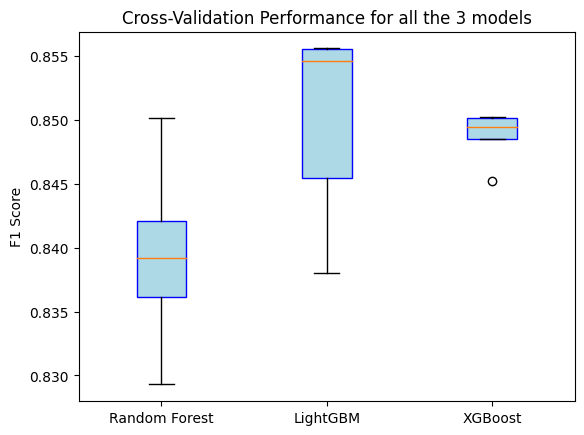

In [63]:
cv_results = [cv_scores_val, cv_scores_lgbm_val, cv_scores_xgb_val]
models = ['Random Forest', 'LightGBM', 'XGBoost']

plt.boxplot(cv_results, labels=models, patch_artist=True, 
            boxprops=dict(facecolor="lightblue", color="blue"))
plt.ylabel('F1 Score')
plt.title('Cross-Validation Performance for all the 3 models')
plt.show()

In [64]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_xgb = confusion_matrix(y_val_encoded, y_pred_xgb)
cm_rf = confusion_matrix(y_val_encoded, y_pred_forest)
cm_lgb = confusion_matrix(y_val_encoded, y_pred_lgb)

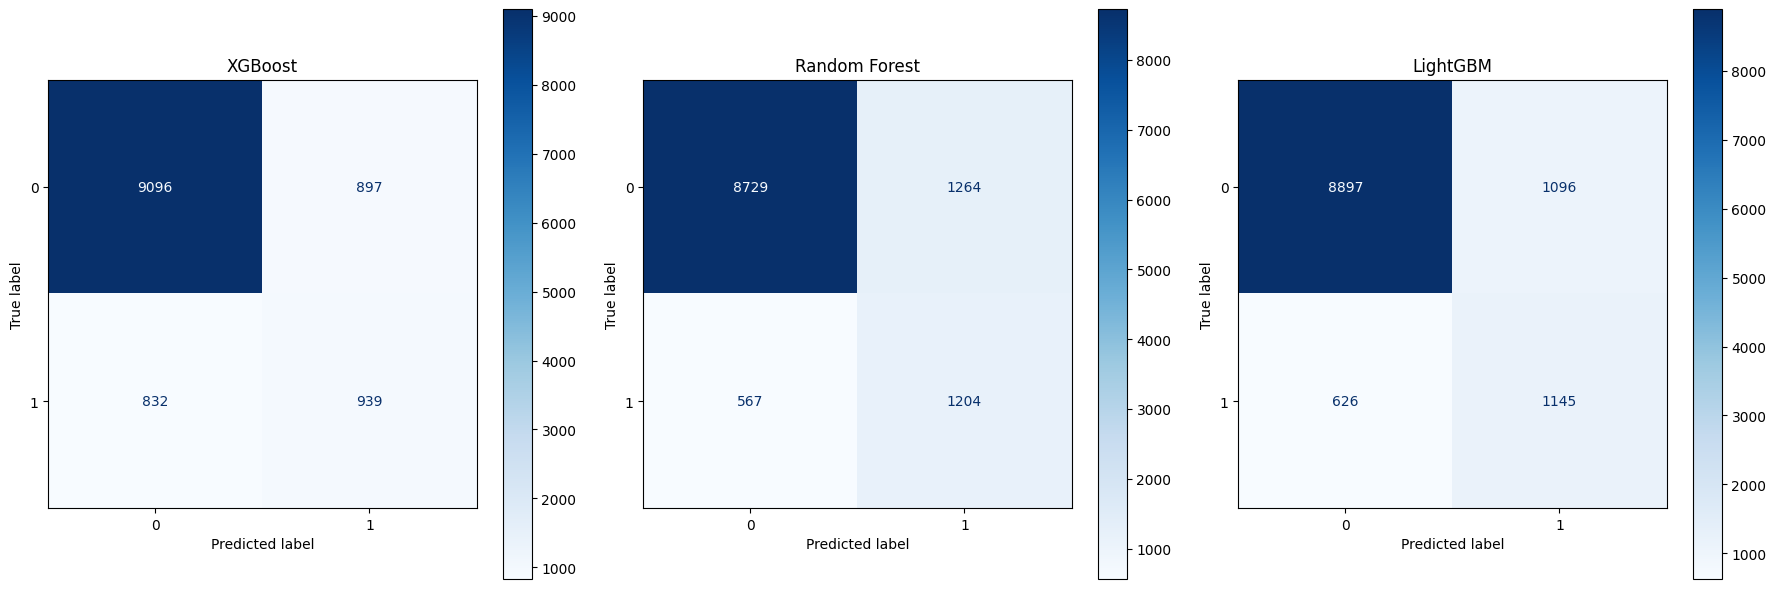

In [65]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
ConfusionMatrixDisplay(cm_xgb, display_labels=[0, 1]).plot(ax=axes[0], cmap='Blues')
axes[0].set_title('XGBoost')

ConfusionMatrixDisplay(cm_rf, display_labels=[0, 1]).plot(ax=axes[1], cmap='Blues')
axes[1].set_title('Random Forest')

ConfusionMatrixDisplay(cm_lgb, display_labels=[0, 1]).plot(ax=axes[2], cmap='Blues')
axes[2].set_title('LightGBM')

plt.tight_layout()
plt.show()

## ***Part 4: Submission***

In [66]:
test_final = feature_selection_pipeline.transform(test)

In [67]:
model_to_post = final_model_lgb.fit(X_train_resampled,y_train_resampled)

[LightGBM] [Info] Number of positive: 23391, number of negative: 23391
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.037784 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 23915
[LightGBM] [Info] Number of data points in the train set: 46782, number of used features: 98
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


In [68]:
y_pred_final = model_to_post.predict(test_final)

In [69]:
y_pred_final

array([0, 0, 0, ..., 0, 0, 0])

In [70]:
y_pred_test_final = label_encoder.inverse_transform(y_pred_final)

In [71]:
y_pred_test_final.shape

(10000,)

In [72]:
submission = pd.DataFrame({'id': range(0,test.shape[0]),
                         'target':y_pred_test_final})
submission.to_csv('submission.csv',index = False)